In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from lib.TensorV2 import Tensor
from lib.NN import MLP, ReLU, MSELoss
from lib.Optimizers import SGD

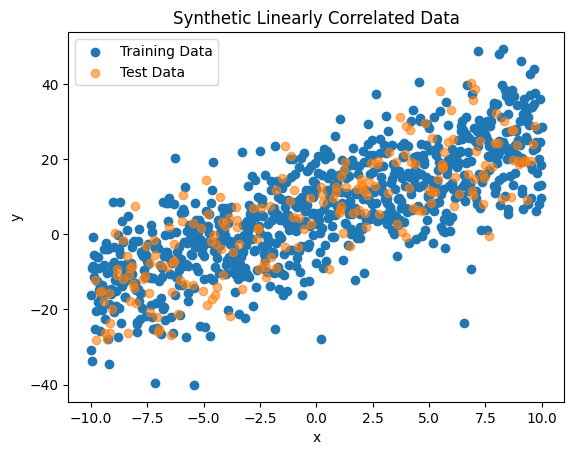

In [2]:
n_samples = 1000

x = np.linspace(-10, 10, n_samples) # 100 samples between -10 and 10

# generate y = 2x + 1
y = 2 * x + 1
# add noise
y += np.random.normal(5, 10, n_samples)


# reshape x and y to be column vectors
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

x, y = shuffle(x, y, random_state=0)

# split into train and test sets
train_split = int(0.8 * n_samples)
test_split = n_samples - train_split

train_x, test_x = x[:train_split], x[train_split:]
train_y, test_y = y[:train_split], y[train_split:]

train_inputs = Tensor(train_x, requires_grad=True)
train_targets = Tensor(train_y, requires_grad=True)

test_inputs = Tensor(test_x, requires_grad=True)
test_targets = Tensor(test_y, requires_grad=True)

# Plot
plt.scatter(train_x, train_y, label="Training Data")
plt.scatter(test_x, test_y, label="Test Data", alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Synthetic Linearly Correlated Data')
plt.show()

In [3]:
train_inputs.shape, train_targets.shape

((800, 1), (800, 1))

In [4]:
model = MLP([2, 10, 2], ReLU)
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=0.001)

In [5]:
t1 = Tensor.randn(800, 2, requires_grad=True)
t2 = Tensor.randn(800, 2, requires_grad=True)

In [6]:
pred = model(t1)
loss = criterion(pred, t2)
loss.backward()

ValueError: cannot reshape array of size 1600 into shape (2,)